In [2]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import glob
from annoy import AnnoyIndex

In [3]:
files = glob.glob("images/*/*.jpg")
len(files)

629

In [8]:
img_list = []
for file in files:
    img_list.append(Image.open(file))

In [9]:
len(img_list)

629

In [10]:
model = SentenceTransformer('clip-ViT-B-32')

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [11]:
embeddings = model.encode(img_list, batch_size=32)
len(embeddings)

629

In [12]:
embeddings.shape

(629, 512)

In [14]:
# embeddings[0]

In [15]:
annoy_index = AnnoyIndex(512, metric="angular")

In [16]:
for idx, embedding in enumerate(embeddings):
    annoy_index.add_item(idx, embedding)

In [17]:
annoy_index.build(10)

True

In [19]:
query_text = model.encode(["portrait"])
query_text.shape

(1, 512)

In [20]:
res = annoy_index.get_nns_by_vector(query_text[0], 5)

In [21]:
res

[36, 6, 609, 22, 529]

images\csg_1276\642018.jpg
319 None


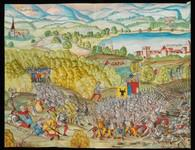

images\csg_1276\642020.jpg
320 None


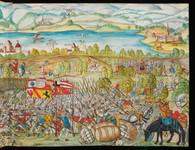

images\csg_1276\733285.jpg
628 None


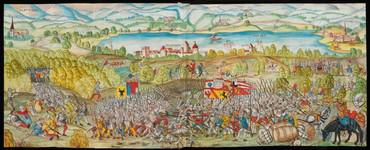

images\csg_1276\642149.jpg
449 None


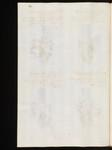

images\csg_1276\642017.jpg
318 None


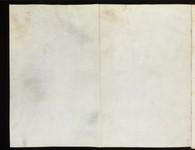

In [28]:
query_text = model.encode(["medieval landscape"])
res = annoy_index.get_nns_by_vector(query_text[0], 5)
for item in res:
    print(item, print(files[item]))
    display(img_list[item])